In [2]:
import pandas as pd
data = pd.read_csv("train.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data['Age'].fillna(data['Age'].mean())
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
X = data[['Pclass', 'Sex', 'Age']]  
y = data['Survived']   

In [15]:
print(X)

     Pclass  Sex        Age
0         3  NaN  22.000000
1         1  NaN  38.000000
2         3  NaN  26.000000
3         1  NaN  35.000000
4         3  NaN  35.000000
..      ...  ...        ...
886       2  NaN  27.000000
887       1  NaN  19.000000
888       3  NaN  29.699118
889       1  NaN  26.000000
890       3  NaN  32.000000

[891 rows x 3 columns]


In [16]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [17]:
type(y)

pandas.core.series.Series

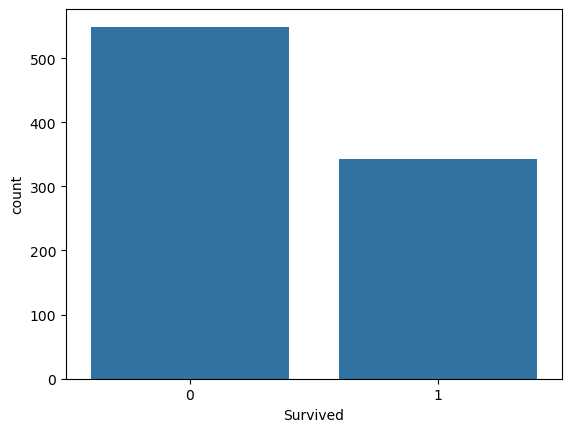

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Survived', data=data)
plt.show()

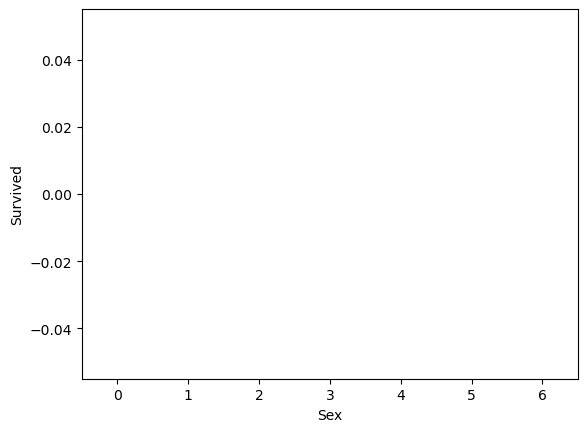

In [22]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

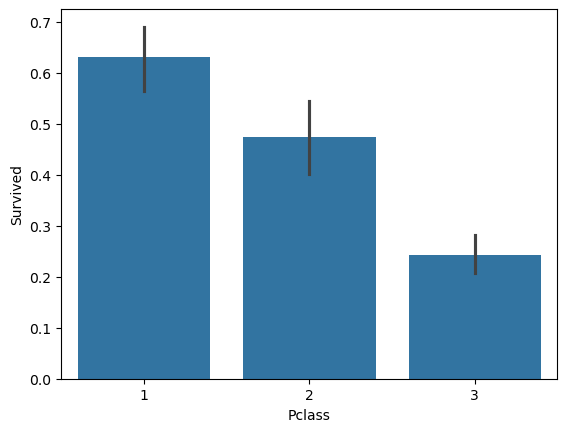

In [23]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

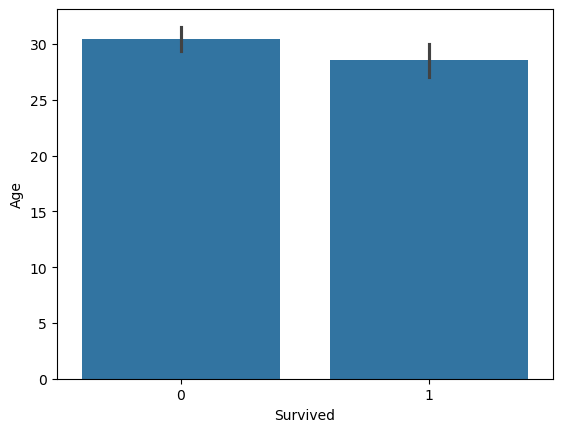

In [25]:
sns.barplot(x='Survived',y='Age',data=data)
plt.show()

In [4]:
import numpy as np 
mean_age = data['Age'].mean()
var_age = data['Age'].var()
std_age = data['Age'].std()
mean_age,var_age,std_age

(np.float64(29.69911764705882), 211.0191247463081, 14.526497332334044)

Mean = average

Variance = spread

Std = dispersion

In [5]:
prob_survival = data['Survived'].mean()
prob_female_survival = data[data['Sex'] == 1]['Survived'].mean()
prob_male_survival = data[data['Sex'] == 0]['Survived'].mean()
prob_survival, prob_female_survival, prob_male_survival


(np.float64(0.3838383838383838),
 np.float64(0.7420382165605095),
 np.float64(0.18890814558058924))

“Females had higher conditional probability of survival.”

In [7]:
corr = data[['Age', 'Pclass', 'Sex', 'Survived']].corr()
corr 

,Age,Pclass,Sex,Survived
Age,1.000000,-0.369226,-0.093254,-0.077221
Pclass,-0.369226,1.000000,-0.131900,-0.338481
Sex,-0.093254,-0.131900,1.000000,0.543351
Survived,-0.077221,-0.338481,0.543351,1.000000


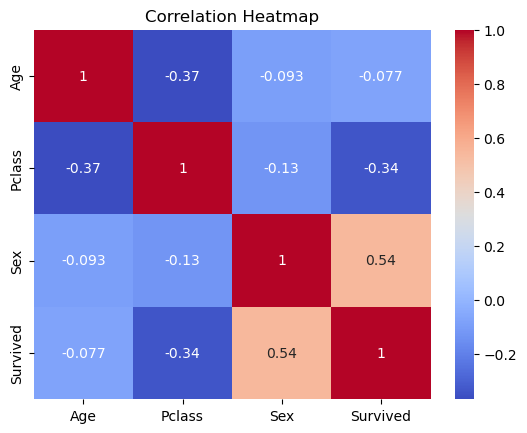

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Sex strongly correlated with Survived

Pclass negatively correlated

In [11]:
X = data[['Pclass', 'Sex', 'Age']].values  # Matrix
y = data['Survived'].values               # Vector

X.shape, y.shape

((891, 3), (891,))

In [12]:
np.dot(X[0], X[1])

np.float64(839.0)

In [13]:
X.T.shape

(3, 891)

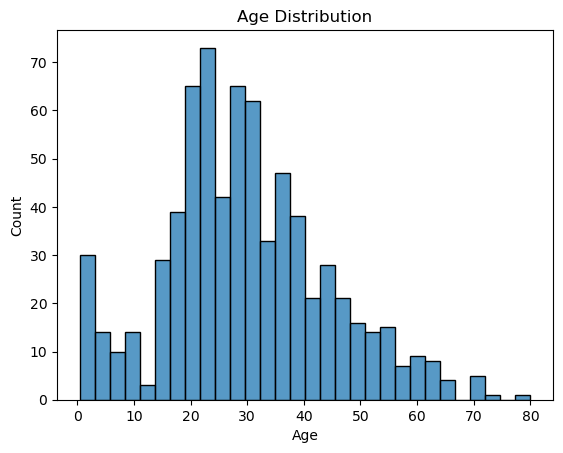

In [14]:
sns.histplot(data['Age'], bins=30)
plt.title("Age Distribution")
plt.show()

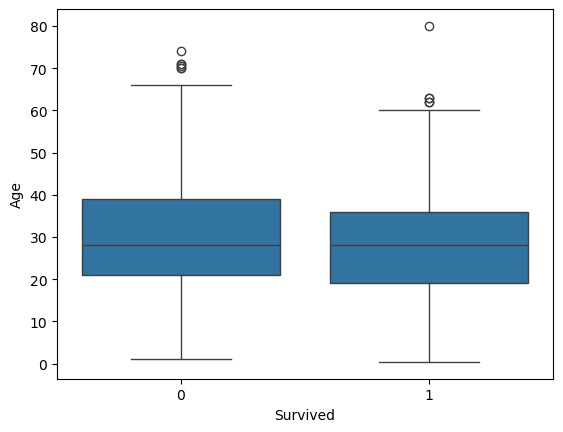

In [15]:
sns.boxplot(x='Survived', y='Age', data=data)
plt.show()